In [14]:
import pandas as pd  # For handling data in DataFrame format
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualizing data
import seaborn as sns  # For enhanced data visualization

from sklearn.model_selection import train_test_split  # Splitting dataset into training and testing
from sklearn.preprocessing import StandardScaler  # Standardizing numerical data
from sklearn.ensemble import RandomForestClassifier  # Machine learning model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Model evaluation metrics

# Load dataset
df = pd.read_csv(r"D:\Kuli\Work\heartdissease\Heart Prediction Quantum Dataset.csv")

# Display first 100 rows to understand the data
df.head()


,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


In [2]:
# Data Preprocessing
# Check for missing values in each column
print(df.isnull().sum())


Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64


In [3]:
X = df.drop(columns=["HeartDisease"])  # Features (independent variables)
y = df["HeartDisease"]  # Target variable (dependent variable)


In [4]:
# Split Data into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Normalize the Data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fit on training data and transform
X_test = scaler.transform(X_test)  # Transform test data using the same scaler


In [6]:
# Train a Machine Learning Model (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 decision trees
model.fit(X_train, y_train)  # Train the model on the training set


RandomForestClassifier(random_state=42)

In [7]:
# Make Predictions
y_pred = model.predict(X_test)  # Predict on test set


In [8]:
# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.93


In [9]:
# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        40
           1       1.00      0.88      0.94        60

    accuracy                           0.93       100
   macro avg       0.93      0.94      0.93       100
weighted avg       0.94      0.93      0.93       100



In [17]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")


Training Accuracy: 1.00
Testing Accuracy: 0.93


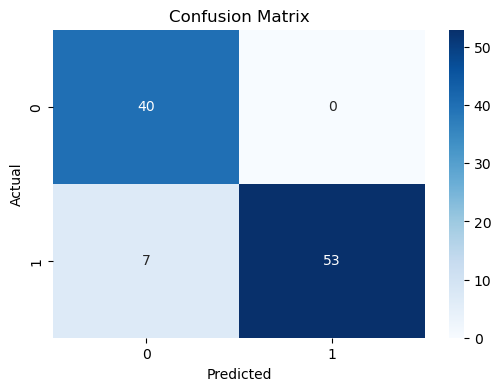

In [16]:
# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [11]:
# Example new patient data (age, gender, blood pressure, cholesterol, heart rate, qpf)
new_data = np.array([[55, 0, 210, 140, 120, 8.7]])

# Scale the new data
new_data_scaled = scaler.transform(new_data)

# Make prediction
prediction = model.predict(new_data_scaled)

print("Heart Disease Prediction (1 = Disease, 0 = No Disease):", prediction[0])


Heart Disease Prediction (1 = Disease, 0 = No Disease): 0


d:\APK\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
